<a href="https://colab.research.google.com/github/JaimeAndresSalas/Fundamentos-Practicos-de-Machine-Learning/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','	Ankle boot']

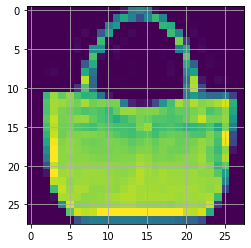

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0


In [0]:
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


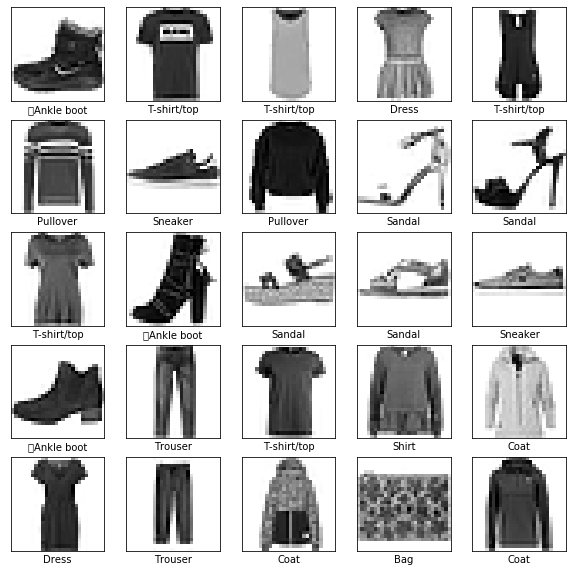

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [10]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu), 
                          keras.layers.Dense(10, activation= tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer= tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs= 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/sample - loss: 1.1110 - acc: 0.6583
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6564 - acc: 0.7632
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5805 - acc: 0.7903
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5365 - acc: 0.8087
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5074 - acc: 0.8197


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy : ', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.5219 - acc: 0.8114
Accuracy :  0.8114


In [0]:
predictions = model.predict(test_images)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


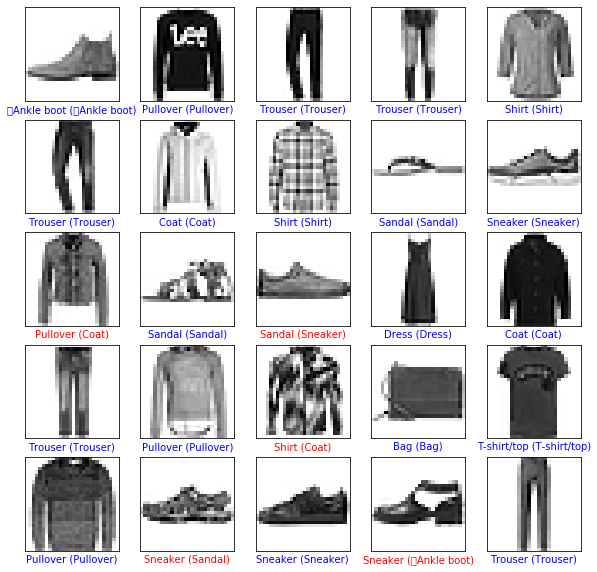

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i],cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else :
    color= 'red'
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)